# SVMによる分類

### 身長、体重からBMIを計算して、0 : 太ってる・1 : 普通・2 : 痩せてるを分類する
### BMI = 体重(kg) ÷ 身長(m) x 身長(m)
### BMIが18.5以上25未満は普通

Data set, {0: 371, 1: 317, 2: 312}
正解率= 0.945
[[73  2  0]
 [ 1 60  2]
 [ 0  6 56]]
レポート=
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.88      0.95      0.92        63
           2       0.97      0.90      0.93        62

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



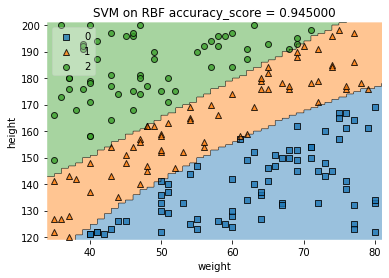

正解率= 0.995
[[74  1  0]
 [ 0 63  0]
 [ 0  0 62]]
レポート=
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.98      1.00      0.99        63
           2       1.00      1.00      1.00        62

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



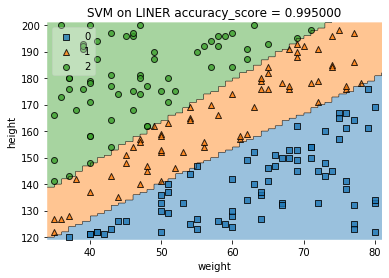

正解率= 0.96
[[73  2  0]
 [ 2 61  0]
 [ 0  4 58]]
レポート=
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.91      0.97      0.94        63
           2       1.00      0.94      0.97        62

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



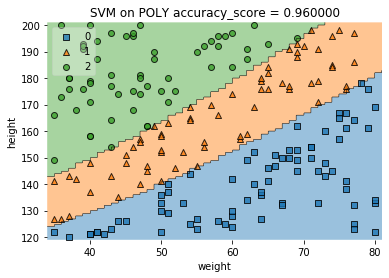

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


正解率= 0.345
[[65 10  0]
 [59  4  0]
 [62  0  0]]
レポート=
               precision    recall  f1-score   support

           0       0.35      0.87      0.50        75
           1       0.29      0.06      0.10        63
           2       0.00      0.00      0.00        62

    accuracy                           0.34       200
   macro avg       0.21      0.31      0.20       200
weighted avg       0.22      0.34      0.22       200



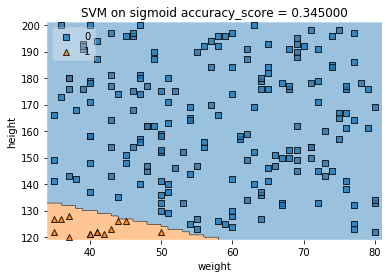

In [25]:
import sys
import random
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics
from mlxtend.plotting import plot_decision_regions
import pandas as pd

# BMIを計算 ラベルを返す
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    
    if bmi > 25:
        return 0
    
    elif bmi < 18.5:
        return 2
    else:
        return 1

"""
#データ出力
fp = open("bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\r\n")


# データセット作成
cnt = {0:0, 1:0, 2:0}
for i in range(1000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))
    #print("Data set,", h,w,label)
fp.close()

print("Data set,", cnt) 
"""


# 身長・体重データ読み込み
tbl = pd.read_csv("bmi.csv")

# カラム(列)をスライスして正規化
label = tbl["label"]
w = tbl["weight"] / 100        # 最大100kgとする
h = tbl["height"] / 200        # 最長200cmとする
wh = pd.concat([w, h], axis=1)
# plotのため正規化しない
w2 = tbl["weight"]
h2 = tbl["height"]
wh2 = pd.concat([w2, h2], axis=1)

#各ラベルの数をカウント
cnt = {0:0, 1:0, 2:0}
for lab in label:
    if lab == 0:
        cnt[0] += 1
    elif lab == 1:
        cnt[1] += 1
    elif lab == 2:
        cnt[2] += 1
            
print("Data set,", cnt)


# データセットを学習データ、テストデータ、学習データラベル、テストデータラベルに分ける
data_train, data_test, label_train, label_test = train_test_split(wh2, label , test_size=0.2,random_state=4)

# データを学習
Kernel = ['RBF','LINEAR','POLY','SIGMOID']
for i,kn in enumerate(Kernel):
    if i == 0:
        clf = SVC(kernel = "rbf",C=3,gamma="scale")     # ガウシアンカーネル
    elif i == 1:
        clf = SVC(kernel = "linear",C=3,gamma="scale")  # 線形カーネル
    elif i == 2:
        clf = SVC(kernel = "poly",C=3,gamma="scale")    # 多項式カーネル
    elif i == 3:
        clf = SVC(kernel = "sigmoid",C=3,gamma="scale") # シグモイドカーネル
      
    clf.fit(data_train, label_train)


    # データを予測
    predict = clf.predict(data_test)
    #print(predict)

    # 合っているか結果を確認
    ac_score = accuracy_score(label_test, predict)
    cl_report = metrics.classification_report(label_test, predict)

    print("正解率=", ac_score)
    #print(confusion_matrix(label_test, predict,labels=["fat","normal","thin"]))
    print(confusion_matrix(label_test, predict,labels=[0,1,2]))
    print("レポート=\n", cl_report)

    #plot
    x_combined = np.array(data_test.values)
    y_combined = np.array(predict)


    fig = plt.figure(figsize=(6,4))
    plot_decision_regions(x_combined, y_combined, clf=clf,legend=2)
    plt.xlabel('weight')
    plt.ylabel('height')
    if i == 0:
        plt.title('SVM on RBF accuracy_score = %f' %(ac_score))     # ガウシアンカーネル
    elif i == 1:
        plt.title('SVM on LINER accuracy_score = %f' %(ac_score))  # 線形カーネル
    elif i == 2:
         plt.title('SVM on POLY accuracy_score = %f' %(ac_score))  # 多項式カーネル
    elif i == 3:
         plt.title('SVM on sigmoid accuracy_score = %f' %(ac_score))  #シグモイドカーネル
    
    plt.show()
